In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import time
import matplotlib
from scipy import linalg
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import r2_score
%matplotlib inline

sns.set(style="darkgrid") 

## Данные

In [2]:
# x = np.array([45.1, 59.0, 57.2, 61.8, 58.8, 47.2, 55.2])
# y = np.array([68.8, 61.2, 59.9, 56.7, 55.0, 54.3, 49.3])

x = np.array([524, 371, 453, 1006, 997, 217, 486, 1989, 595, 1550, 937, 761, 767, 1720, 1735, 1052])
y = np.array([408, 249, 253, 580, 651, 139, 322, 899, 330, 446, 642, 542, 504, 861, 707, 557])

n = len(y)

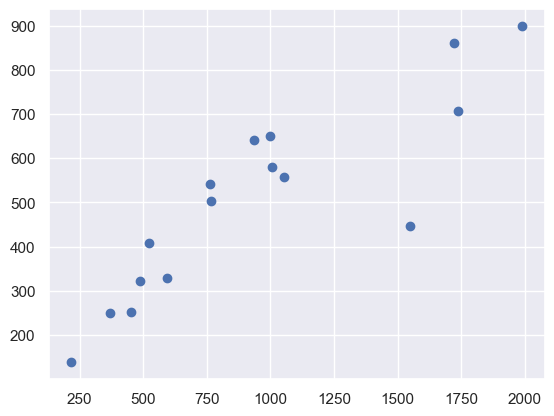

In [3]:
# График
plt.scatter(x, y)

# Модель линейной регрессии

## Расчет показателей

In [4]:
meanX  = np.sum(x) / len(x)
meanY  = np.sum(y) / len(y)
meanXY = np.sum(x * y) / len(x)
meanYY = np.sum(y**2) / len(y)
meanXX = np.sum(x**2) / len(x)

print(meanX, meanY, meanXY, meanXX, meanYY)

947.5 505.625 575614.75 1171256.875 300191.25


In [5]:
b_line = (meanXY - meanX * meanY) / (meanXX - meanX**2)
a_line = meanY - b_line*meanX
print('a = ', a_line)
print('b = ', b_line)

a =  171.19442340168325
b =  0.3529610307106245


In [6]:
def f_line(a, b, x):
    return a + b*x

In [7]:
data = pd.DataFrame()

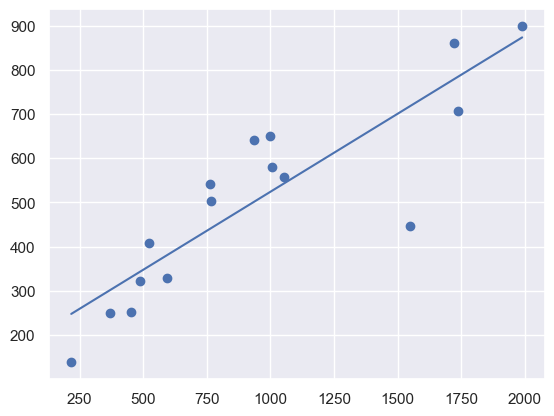

In [8]:
# График
plt.scatter(x, y)
polyline = np.linspace(min(x), max(x), 100)
data['Y_line'] = f_line(a_line, b_line, polyline)
plt.plot(polyline, data['Y_line'])

## Анализ линейной модели регресии

### Параметр b

In [9]:
if b_line > 0:
    print(f'x увеличением на 1 ед в среднем у увеличивается на', b_line)
else:
    print(f'x увеличением на 1 ед в среднем у уменьшается на', b_line)

x увеличением на 1 ед в среднем у увеличивается на 0.3529610307106245


### Оценка тесноты связи между признаками

In [10]:
sigma_x = (meanXX - meanX**2)**(0.5)
sigma_y = (meanYY - meanY**2)**(0.5)
r_xy = b_line * (sigma_x / sigma_y)
R_2 = r_xy**2
print(sigma_x, sigma_y, r_xy)

522.9728721453915 211.03224723961029 0.8746959121207051


In [11]:
if(0.1 <= abs(r_xy) and abs(r_xy) < 0.3):
    print('Линейная связь между x и y слабая')
elif(0.3 <= abs(r_xy) and abs(r_xy) < 0.5):
    print('Линейная связь между x и y умеренная')
elif(0.5 <= abs(r_xy) and abs(r_xy) < 0.7):
    print('Линейная связь между x и y заметная')
elif(0.7 <= abs(r_xy) and abs(r_xy) < 0.9):
    print('Линейная связь между x и y высокая')
elif(0.9 <= abs(r_xy) and abs(r_xy) < 0.99):
    print('Линейная связь между x и y весьма высокая')
else:
    print('Точная функциональная связь')

Линейная связь между x и y высокая


In [12]:
print(f'Модель регрессии на {round(R_2, 3) * 100}% объясняет поведение\n' + 
      f'результативного признака y в зависимости от\n'+
      f'фактора x, {(1 - round(R_2, 3)) * 100}% на долю неучтенных факторов')

Модель регрессии на 76.5% объясняет поведение
результативного признака y в зависимости от
фактора x, 23.5% на долю неучтенных факторов


### Оценка качества уравнения регресии

In [13]:
def meanErrorAproc(y, y_cal):
    A = 0
    for i in range(len(y)):
        A += abs((y_cal[i] - y[i]) / y[i])
    A /= len(y)
    return A * 100

In [14]:
print('Средняя ошибка апроцсимации:', round(meanErrorAproc(y, f_line(a_line, b_line, x)), 2), '%')

Средняя ошибка апроцсимации: 20.87 %


### Оценка статистической значимости уравнения регрессии

In [15]:
F_calc = (r_xy**2) / (1 - r_xy**2) * (len(y) - 2)
F_tabl = stats.f.isf(0.05, 1, len(y) - 2)
print(F_calc, F_tabl)

45.59803814057632 4.600109936669421


In [16]:
if (F_calc > F_tabl):
    print('Статистическая значимость уравнение регрессии признается')
else:
    print('Статистическая значимость уравнение регрессии не признается')

Статистическая значимость уравнение регрессии признается


### Критерий Стьюдента. Оценка статистической значимости параметров и корреляции. 

In [17]:
s_ost = (np.sum((y - f_line(a_line, b_line, x))**2) / (n - 2))**0.5
tmp_x = np.sum((x - meanX)**2)

m_b = (s_ost / (sigma_x * n**0.5))
m_a = s_ost * ((np.sum(x**2)**0.5) / (n * sigma_x))
m_r_xy = ((1 - r_xy**2) / (n - 2))**0.5
print(m_a, m_b, m_r_xy)

56.569163499437806 0.052270142035876245 0.1295340719985418


In [18]:
t_tabl = stats.t.ppf(1-0.025, n-2)
print(t_tabl)

2.1447866879169273


In [19]:
if m_a != 0:
    t_a = a_line / m_a
    if(t_a > t_tabl):
        print('Параметр a стат значемый', t_a, t_tabl)
    else:
        print('Параметр a не стат значемый', t_a, t_tabl)
        
if m_b != 0:
    t_b = b_line / m_b
    if(t_b > t_tabl):
        print('Параметр b стат значемый', t_b, t_tabl)
    else:
        print('Параметр b не стат значемый', t_b, t_tabl)
        
if m_r_xy != 0:    
    t_r_xy = r_xy / m_r_xy
    if(t_r_xy > t_tabl):
        print('Параметр r_xy стат значемый', t_r_xy, t_tabl)
    else:
        print('Параметр r_xy не стат значемый', t_r_xy, t_tabl)

Параметр a стат значемый 3.026285219921709 2.1447866879169273
Параметр b стат значемый 6.752631941737702 2.1447866879169273
Параметр r_xy стат значемый 6.752631941737706 2.1447866879169273


### Доверительные интервалы

In [20]:
delta_a_line = t_tabl * m_a
delta_b_line = t_tabl * m_b
print(delta_a_line, delta_b_line)

121.32878882019035 0.11210830481407437


In [21]:
print('y_a =', a_line, '±', delta_a_line)
print('y_b =', b_line, '±', delta_b_line)

y_a = 171.19442340168325 ± 121.32878882019035
y_b = 0.3529610307106245 ± 0.11210830481407437


### Прогноз

In [22]:
x_pred = 91.6
my = (s_ost * (1 + 1 / n + ((x_pred - meanX)**2 / (n * np.sum((x - meanX)**2))))**0.5)
delta_y = my * t_tabl

In [23]:
print(my, t_tabl, delta_y)

113.26224480127742 2.1447866879169273 242.923354893368


In [24]:
f_line(a_line, b_line, x_pred)

203.52565381477646

In [25]:
lhs = x_pred - delta_y
rhs = x_pred + delta_y 

In [26]:
print('y_p =', x_pred, '±', delta_y)
print('[' + str(lhs) + ' : ' + str(rhs) + ']')

y_p = 91.6 ± 242.923354893368
[-151.32335489336802 : 334.52335489336804]


In [27]:
D_y = rhs / lhs
print('Диапазон верхнего и нижнего интервала составляет', D_y)

Диапазон верхнего и нижнего интервала составляет -2.2106525138111977


# Модель нелинейной регрессии

## Степенная модель

In [28]:
def f_step(a, b, x):
    return a * x ** b

In [29]:
ln_x_step = np.sum(np.log(x))
ln_x_2_step = np.sum(np.log(x)**2)
ln_y_step = np.sum(np.log(y))
ln_x_y_step = np.sum(np.log(x)*np.log(y))
print(ln_x_step, ln_x_2_step, ln_y_step, ln_x_y_step)

106.99523296174037 721.2873079640879 97.93748840842531 659.2531149653695


3.077974913754087 0.7472214979308086


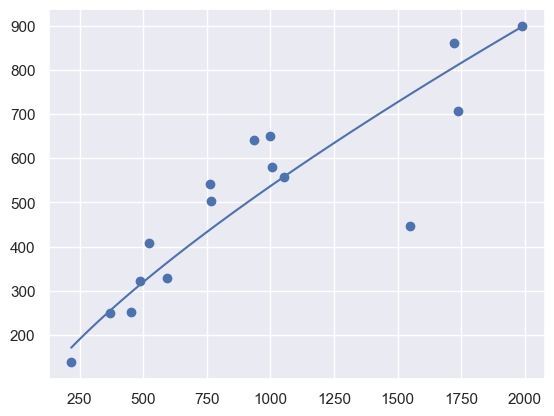

In [30]:
b_step = (n * ln_x_y_step - ln_x_step * ln_y_step) / (n * ln_x_2_step - (ln_x_step)**2)
a_step = np.exp((ln_y_step - (b_step * ln_x_step)) / n)
polyline = np.linspace(min(x), max(x), 100)
data['Y_step'] = f_step(a_step, b_step, polyline)
 
print(a_step, b_step)
plt.scatter(x, y)
plt.plot(polyline, data['Y_step'])
plt.show()

### Анализ

#### Индекс корреляции и детерминации

In [31]:
R = (1 - np.sum((y - f_step(a_step, b_step, x))**2) / np.sum((y - np.mean(y))**2))**0.5
R_2 = R**2
print(R, R_2)

0.8803794424512937 0.7750679626908509


In [32]:
if(0.1 <= abs(R) and abs(R) < 0.3):
    print('Линейная связь между x и y слабая')
elif(0.3 <= abs(R) and abs(R) < 0.5):
    print('Линейная связь между x и y умеренная')
elif(0.5 <= abs(R) and abs(R) < 0.7):
    print('Линейная связь между x и y заметная')
elif(0.7 <= abs(R) and abs(R) < 0.9):
    print('Линейная связь между x и y высокая')
elif(0.9 <= abs(R) and abs(R) < 0.99):
    print('Линейная связь между x и y весьма высокая')
else:
    print('Точная функциональная связь')

Линейная связь между x и y высокая


#### Оценка качества уравнения регресии

In [33]:
print('Средняя ошибка апроцсимации:', round(meanErrorAproc(y, f_step(a_step, b_step, x)), 2), '%')

Средняя ошибка апроцсимации: 15.05 %


#### F-критерии Фишера. Оценка статистической значимости уравнения регрессии

In [34]:
F_calc = (R**2) / (1 - R**2) * (len(y) - 2)
F_tabl = stats.f.isf(0.05, 1, len(y) - 2)
print(F_calc, F_tabl)

48.24102252165281 4.600109936669421


In [35]:
if (F_calc > F_tabl):
    print('Статистическая значимость уравнение регрессии признается')
else:
    print('Статистическая значимость уравнение регрессии не признается')

Статистическая значимость уравнение регрессии признается


#### Критерий Стьюдента. Оценка статистической значимости параметров и корреляции

In [36]:
s_ost = (np.sum((y - f_step(a_step, b_step, x))**2) / (n - 2))**0.5
tmp_x = np.sum((x - meanX)**2)

m_b = (s_ost / (sigma_x * n**0.5))
m_a = s_ost * ((np.sum(x**2)**0.5) / (n * sigma_x))
m_r_xy = ((1 - r_xy**2) / (n - 2))**0.5
print(m_a, m_b, m_r_xy)

55.3550668099193 0.05114831165195957 0.1295340719985418


In [37]:
t_tabl = stats.t.ppf(1-0.025, n-2)
print(t_tabl)

2.1447866879169273


In [38]:
if m_a != 0:
    t_a = a_step / m_a
    if(t_a > t_tabl):
        print('Параметр a стат значемый', t_a, t_tabl)
    else:
        print('Параметр a не стат значемый', t_a, t_tabl)
        
if m_b != 0:
    t_b = b_step / m_b
    if(t_b > t_tabl):
        print('Параметр b стат значемый', t_b, t_tabl)
    else:
        print('Параметр b не стат значемый', t_b, t_tabl)
        
if m_r_xy != 0:    
    t_r_xy = r_xy / m_r_xy
    if(t_r_xy > t_tabl):
        print('Параметр r_xy стат значемый', t_r_xy, t_tabl)
    else:
        print('Параметр r_xy не стат значемый', t_r_xy, t_tabl)

Параметр a не стат значемый 0.05560421278730228 2.1447866879169273
Параметр b стат значемый 14.608918140158814 2.1447866879169273
Параметр r_xy стат значемый 6.752631941737706 2.1447866879169273


---

## Экспоненциальная модель

In [39]:
def f_exp(a, b, x):
    return np.exp(a + b*x)

In [40]:
x_2_exp = np.sum(x**2)
ln_y_exp = np.sum(np.log(y))
x_ln_y_exp = np.sum(x*np.log(y))
print(x_2_exp, ln_y_exp, x_ln_y_exp)

18740110 97.93748840842531 96154.08625365006


5.393945601876483 0.0007674379141425843


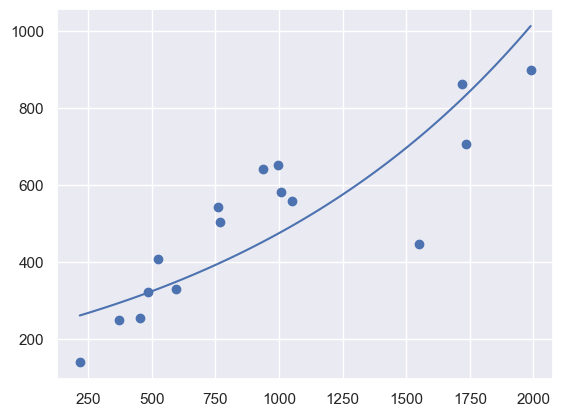

In [41]:
b_exp = (n * x_ln_y_exp - np.sum(x) * ln_y_exp) / (n * x_2_exp - (np.sum(x))**2)
a_exp = (ln_y_exp - b_exp * np.sum(x)) / n
polyline = np.linspace(min(x), max(x), 100)
data['Y_exp'] = f_exp(a_exp, b_exp, polyline)
 
print(a_exp, b_exp)
plt.scatter(x, y)
plt.plot(polyline, data['Y_exp'])
plt.show()

### Анализ

#### Индекс корреляции и детерминации

In [42]:
R = (1 - np.sum((y - f_exp(a_exp, b_exp, x))**2) / np.sum((y - np.mean(y))**2))**0.5
R_2 = R**2
print(R, R_2)

0.8061156129038208 0.6498223813673027


In [43]:
if(0.1 <= abs(R) and abs(R) < 0.3):
    print('Линейная связь между x и y слабая')
elif(0.3 <= abs(R) and abs(R) < 0.5):
    print('Линейная связь между x и y умеренная')
elif(0.5 <= abs(R) and abs(R) < 0.7):
    print('Линейная связь между x и y заметная')
elif(0.7 <= abs(R) and abs(R) < 0.9):
    print('Линейная связь между x и y высокая')
elif(0.9 <= abs(R) and abs(R) < 0.99):
    print('Линейная связь между x и y весьма высокая')
else:
    print('Точная функциональная связь')

Линейная связь между x и y высокая


#### Оценка качества уравнения регресии

In [44]:
print('Средняя ошибка апроцсимации:', round(meanErrorAproc(y, f_exp(a_exp, b_exp, x)), 2), '%')

Средняя ошибка апроцсимации: 24.05 %


#### F-критерии Фишера. Оценка статистической значимости уравнения регрессии

In [45]:
F_calc = (R**2) / (1 - R**2) * (len(y) - 2)
F_tabl = stats.f.isf(0.05, 1, len(y) - 2)
print(F_calc, F_tabl)

25.97971102397797 4.600109936669421


In [46]:
if (F_calc > F_tabl):
    print('Статистическая значимость уравнение регрессии признается')
else:
    print('Статистическая значимость уравнение регрессии не признается')

Статистическая значимость уравнение регрессии признается


#### Критерий Стьюдента. Оценка статистической значимости параметров и корреляции

In [47]:
s_ost = (np.sum((y - f_exp(a_exp, b_exp, x))**2) / (n - 2))**0.5
tmp_x = np.sum((x - meanX)**2)

m_b = (s_ost / (sigma_x * n**0.5))
m_a = s_ost * ((np.sum(x**2)**0.5) / (n * sigma_x))
m_r_xy = ((1 - r_xy**2) / (n - 2))**0.5
print(m_a, m_b, m_r_xy)

69.06784621286556 0.06381897677688692 0.1295340719985418


In [48]:
t_tabl = stats.t.ppf(1-0.025, n-2)
print(t_tabl)

2.1447866879169273


In [49]:
if m_a != 0:
    t_a = a_exp / m_a
    if(t_a > t_tabl):
        print('Параметр a стат значемый', t_a, t_tabl)
    else:
        print('Параметр a не стат значемый', t_a, t_tabl)
        
if m_b != 0:
    t_b = b_exp / m_b
    if(t_b > t_tabl):
        print('Параметр b стат значемый', t_b, t_tabl)
    else:
        print('Параметр b не стат значемый', t_b, t_tabl)
        
if m_r_xy != 0:    
    t_r_xy = r_xy / m_r_xy
    if(t_r_xy > t_tabl):
        print('Параметр r_xy стат значемый', t_r_xy, t_tabl)
    else:
        print('Параметр r_xy не стат значемый', t_r_xy, t_tabl)

Параметр a не стат значемый 0.07809633422262022 2.1447866879169273
Параметр b не стат значемый 0.012025230627334727 2.1447866879169273
Параметр r_xy стат значемый 6.752631941737706 2.1447866879169273


---

## Логарифмическая модель

In [50]:
def f_ln(a, b, x):
    return a + b*np.log(x)

In [51]:
x_ln = np.sum(np.log(x))
x_2_ln = np.sum(np.log(x)**2)
y_ln_x = np.sum(y*np.log(x))
print(x_ln, x_2_ln, y_ln_x)

106.99523296174037 721.2873079640879 55933.174716577996


-1612.7563577968144 316.78141900834936


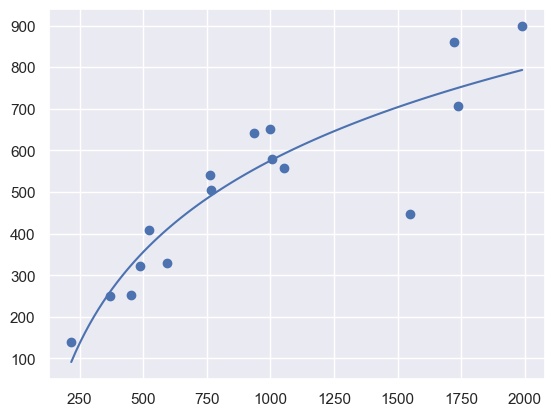

In [52]:
b_ln = ((n * y_ln_x) - (x_ln * np.sum(y))) / (n * x_2_ln - np.sum(np.log(x))**2)
a_ln = (1 * np.sum(y) - b_ln*x_ln) / n
polyline = np.linspace(min(x), max(x), 100)
data['Y_ln'] = f_ln(a_ln, b_ln, polyline)
 
print(a_ln, b_ln)
plt.scatter(x, y)
plt.plot(polyline, data['Y_ln'])
plt.show()

### Анализ

#### Индекс корреляции и детерминации

In [53]:
R = (1 - np.sum((y - f_ln(a_ln, b_ln, x))**2) / np.sum((y - np.mean(y))**2))**0.5
R_2 = R**2
print(R, R_2)

0.9028931695810309 0.8152160756760803


In [54]:
if(0.1 <= abs(R) and abs(R) < 0.3):
    print('Линейная связь между x и y слабая')
elif(0.3 <= abs(R) and abs(R) < 0.5):
    print('Линейная связь между x и y умеренная')
elif(0.5 <= abs(R) and abs(R) < 0.7):
    print('Линейная связь между x и y заметная')
elif(0.7 <= abs(R) and abs(R) < 0.9):
    print('Линейная связь между x и y высокая')
elif(0.9 <= abs(R) and abs(R) < 0.99):
    print('Линейная связь между x и y весьма высокая')
else:
    print('Точная функциональная связь')

Линейная связь между x и y весьма высокая


#### Оценка качества уравнения регресии

In [55]:
print('Средняя ошибка апроцсимации:', round(meanErrorAproc(y, f_ln(a_ln, b_ln, x)), 2), '%')

Средняя ошибка апроцсимации: 15.27 %


#### F-критерии Фишера. Оценка статистической значимости уравнения регрессии

In [56]:
F_calc = (R**2) / (1 - R**2) * (len(y) - 2)
F_tabl = stats.f.isf(0.05, 1, len(y) - 2)
print(F_calc, F_tabl)

61.76416645128987 4.600109936669421


In [57]:
if (F_calc > F_tabl):
    print('Статистическая значимость уравнение регрессии признается')
else:
    print('Статистическая значимость уравнение регрессии не признается')

Статистическая значимость уравнение регрессии признается


#### Критерий Стьюдента. Оценка статистической значимости параметров и корреляции

In [58]:
s_ost = (np.sum((y - f_ln(a_ln, b_ln, x))**2) / (n - 2))**0.5
tmp_x = np.sum((x - meanX)**2)

m_b = (s_ost / (sigma_x * n**0.5))
m_a = s_ost * ((np.sum(x**2)**0.5) / (n * sigma_x))
m_r_xy = ((1 - r_xy**2) / (n - 2))**0.5
print(m_a, m_b, m_r_xy)

50.172277297142976 0.0463593926152204 0.1295340719985418


In [59]:
t_tabl = stats.t.ppf(1-0.025, n-2)
print(t_tabl)

2.1447866879169273


In [60]:
if m_a != 0:
    t_a = a_ln / m_a
    if(t_a > t_tabl):
        print('Параметр a стат значемый', t_a, t_tabl)
    else:
        print('Параметр a не стат значемый', t_a, t_tabl)
        
if m_b != 0:
    t_b = b_ln / m_b
    if(t_b > t_tabl):
        print('Параметр b стат значемый', t_b, t_tabl)
    else:
        print('Параметр b не стат значемый', t_b, t_tabl)
        
if m_r_xy != 0:    
    t_r_xy = r_xy / m_r_xy
    if(t_r_xy > t_tabl):
        print('Параметр r_xy стат значемый', t_r_xy, t_tabl)
    else:
        print('Параметр r_xy не стат значемый', t_r_xy, t_tabl)

Параметр a не стат значемый -32.144372244563264 2.1447866879169273
Параметр b стат значемый 6833.165862150356 2.1447866879169273
Параметр r_xy стат значемый 6.752631941737706 2.1447866879169273


---

## Гиперболическая модель

In [61]:
def f_gip(a, b, x):
    return a + b / x

In [62]:
one_x = np.sum(1 / x)
one_x_2 = np.sum(1 / x**2)
y_div_x = np.sum(y / x)
print(one_x, one_x_2, y_div_x)

0.024096283772759727 5.287768782569367e-05 9.327271316028469


764.953473053192 -172194.83336022575


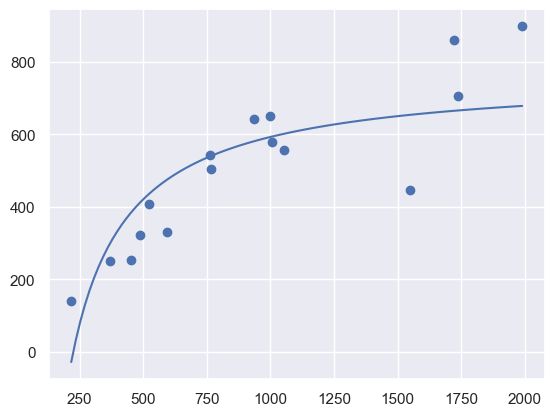

In [63]:
b_gip = (n * y_div_x - one_x * np.sum(y)) / (n * one_x_2 - (one_x)**2)
a_gip = (1 * np.sum(y) - b_gip * one_x) / n
polyline = np.linspace(min(x), max(x), 100)
data['Y_gip'] = f_gip(a_gip, b_gip, polyline)
 
print(a_gip, b_gip)
plt.scatter(x, y)
plt.plot(polyline, data['Y_gip'])
plt.show()

### Анализ

#### Индекс корреляции и детерминации

In [64]:
R = (1 - np.sum((y - f_gip(a_gip, b_gip, x))**2) / np.sum((y - np.mean(y))**2))**0.5
R_2 = R**2
print(R, R_2)

0.8308290635483084 0.6902769328365591


In [65]:
if(0.1 <= abs(R) and abs(R) < 0.3):
    print('Линейная связь между x и y слабая')
elif(0.3 <= abs(R) and abs(R) < 0.5):
    print('Линейная связь между x и y умеренная')
elif(0.5 <= abs(R) and abs(R) < 0.7):
    print('Линейная связь между x и y заметная')
elif(0.7 <= abs(R) and abs(R) < 0.9):
    print('Линейная связь между x и y высокая')
elif(0.9 <= abs(R) and abs(R) < 0.99):
    print('Линейная связь между x и y весьма высокая')
else:
    print('Точная функциональная связь')

Линейная связь между x и y высокая


#### Оценка качества уравнения регресии

In [66]:
print('Средняя ошибка апроцсимации:', round(meanErrorAproc(y, f_gip(a_gip, b_gip, x)), 2), '%')

Средняя ошибка апроцсимации: 25.53 %


#### F-критерии Фишера. Оценка статистической значимости уравнения регрессии

In [67]:
F_calc = (R**2) / (1 - R**2) * (len(y) - 2)
F_tabl = stats.f.isf(0.05, 1, len(y) - 2)
print(F_calc, F_tabl)

31.201670409043828 4.600109936669421


In [68]:
if (F_calc > F_tabl):
    print('Статистическая значимость уравнение регрессии признается')
else:
    print('Статистическая значимость уравнение регрессии не признается')

Статистическая значимость уравнение регрессии признается


#### Критерий Стьюдента. Оценка статистической значимости параметров и корреляции

In [69]:
s_ost = (np.sum((y - f_gip(a_gip, b_gip, x))**2) / (n - 2))**0.5
tmp_x = np.sum((x - meanX)**2)

m_b = (s_ost / (sigma_x * n**0.5))
m_a = s_ost * ((np.sum(x**2)**0.5) / (n * sigma_x))
m_r_xy = ((1 - r_xy**2) / (n - 2))**0.5
print(m_a, m_b, m_r_xy)

64.95588384592244 0.06001950647062314 0.1295340719985418


In [70]:
t_tabl = stats.t.ppf(1-0.025, n-2)
print(t_tabl)

2.1447866879169273


In [71]:
if m_a != 0:
    t_a = a_gip / m_a
    if(t_a > t_tabl):
        print('Параметр a стат значемый', t_a, t_tabl)
    else:
        print('Параметр a не стат значемый', t_a, t_tabl)
        
if m_b != 0:
    t_b = b_gip / m_b
    if(t_b > t_tabl):
        print('Параметр b стат значемый', t_b, t_tabl)
    else:
        print('Параметр b не стат значемый', t_b, t_tabl)
        
if m_r_xy != 0:    
    t_r_xy = r_xy / m_r_xy
    if(t_r_xy > t_tabl):
        print('Параметр r_xy стат значемый', t_r_xy, t_tabl)
    else:
        print('Параметр r_xy не стат значемый', t_r_xy, t_tabl)

Параметр a стат значемый 11.776507804399792 2.1447866879169273
Параметр b не стат значемый -2868981.161058154 2.1447866879169273
Параметр r_xy стат значемый 6.752631941737706 2.1447866879169273


---

## Показательная модель

In [72]:
def f_ind(a, b, x):
    return a * b ** x

In [73]:
x_2_ind = np.sum(x**2)
ln_y_ind = np.sum(np.log(y))
x_ln_y_ind = np.sum(x*np.log(y))
print(x_2_exp, ln_y_exp, x_ln_y_exp)

18740110 97.93748840842531 96154.08625365006


220.06998334401825 1.0007677324699649


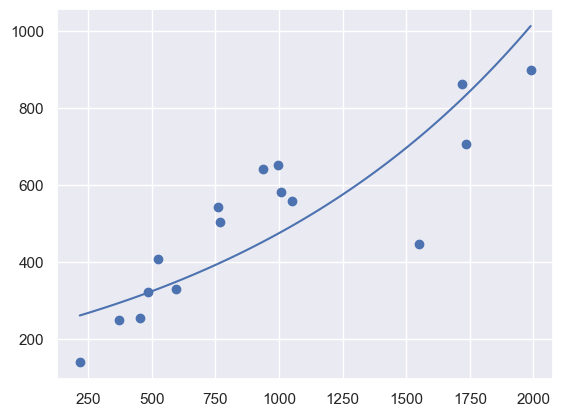

In [74]:
b_ind = np.exp((n * x_ln_y_ind - np.sum(x) * ln_y_ind) / (n * x_2_ind - (np.sum(x))**2))
a_ind = np.exp((ln_y_ind - np.log(b_ind) * np.sum(x)) / n)
polyline = np.linspace(min(x), max(x), 100)
data['Y_ind'] = f_ind(a_ind, b_ind, polyline)
 
print(a_ind, b_ind)
plt.scatter(x, y)
plt.plot(polyline, data['Y_ind'])
plt.show()

### Анализ

#### Индекс корреляции и детерминации

In [75]:
R = (1 - np.sum((y - f_ind(a_ind, b_ind, x))**2) / np.sum((y - np.mean(y))**2))**0.5
R_2 = R**2
print(R, R_2)

0.8061156129038372 0.6498223813673291


In [76]:
if(0.1 <= abs(R) and abs(R) < 0.3):
    print('Линейная связь между x и y слабая')
elif(0.3 <= abs(R) and abs(R) < 0.5):
    print('Линейная связь между x и y умеренная')
elif(0.5 <= abs(R) and abs(R) < 0.7):
    print('Линейная связь между x и y заметная')
elif(0.7 <= abs(R) and abs(R) < 0.9):
    print('Линейная связь между x и y высокая')
elif(0.9 <= abs(R) and abs(R) < 0.99):
    print('Линейная связь между x и y весьма высокая')
else:
    print('Точная функциональная связь')

Линейная связь между x и y высокая


#### Оценка качества уравнения регресии

In [77]:
print('Средняя ошибка апроцсимации:', round(meanErrorAproc(y, f_ind(a_ind, b_ind, x)), 2), '%')

Средняя ошибка апроцсимации: 24.05 %


#### F-критерии Фишера. Оценка статистической значимости уравнения регрессии

In [78]:
F_calc = (R**2) / (1 - R**2) * (len(y) - 2)
F_tabl = stats.f.isf(0.05, 1, len(y) - 2)
print(F_calc, F_tabl)

25.979711023980975 4.600109936669421


In [79]:
if (F_calc > F_tabl):
    print('Статистическая значимость уравнение регрессии признается')
else:
    print('Статистическая значимость уравнение регрессии не признается')

Статистическая значимость уравнение регрессии признается


#### Критерий Стьюдента. Оценка статистической значимости параметров и корреляции

In [80]:
s_ost = (np.sum((y - f_ind(a_ind, b_ind, x))**2) / (n - 2))**0.5
tmp_x = np.sum((x - meanX)**2)

m_b = (s_ost / (sigma_x * n**0.5))
m_a = s_ost * ((np.sum(x**2)**0.5) / (n * sigma_x))
m_r_xy = ((1 - r_xy**2) / (n - 2))**0.5
print(m_a, m_b, m_r_xy)

69.06784621286296 0.0638189767768845 0.1295340719985418


In [81]:
t_tabl = stats.t.ppf(1-0.025, n-2)
print(t_tabl)

2.1447866879169273


In [82]:
if m_a != 0:
    t_a = a_ind / m_a
    if(t_a > t_tabl):
        print('Параметр a стат значемый', t_a, t_tabl)
    else:
        print('Параметр a не стат значемый', t_a, t_tabl)
        
if m_b != 0:
    t_b = b_ind / m_b
    if(t_b > t_tabl):
        print('Параметр b стат значемый', t_b, t_tabl)
    else:
        print('Параметр b не стат значемый', t_b, t_tabl)
        
if m_r_xy != 0:    
    t_r_xy = r_xy / m_r_xy
    if(t_r_xy > t_tabl):
        print('Параметр r_xy стат значемый', t_r_xy, t_tabl)
    else:
        print('Параметр r_xy не стат значемый', t_r_xy, t_tabl)

Параметр a стат значемый 3.186287041089652 2.1447866879169273
Параметр b стат значемый 15.681350328895387 2.1447866879169273
Параметр r_xy стат значемый 6.752631941737706 2.1447866879169273


---

## Квадратичная модель

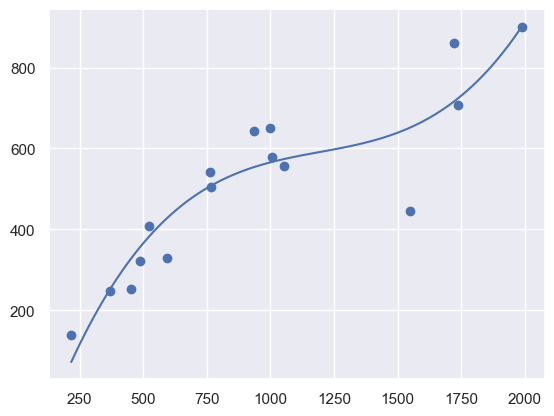

           3            2
4.365e-07 x - 0.001563 x + 1.98 x - 288


In [85]:
model_sqr = np.poly1d(np.polyfit(x, y, 3))
polyline = np.linspace(min(x), max(x), 100)
plt.scatter(x, y)
plt.plot(polyline, model_sqr(polyline))
plt.show()

a_sqr = model_sqr[2]
b_sqr = model_sqr[1]
c_sqr = model_sqr[0]

data['Y_sqr'] = model_sqr(polyline)
print(model_sqr)

### Анализ

#### Индекс корреляции и детерминации

In [86]:
R = (1 - np.sum((y - model_sqr(x))**2) / np.sum((y - np.mean(y))**2))**0.5
R_2 = R**2
print(R, R_2)

0.9254093719078117 0.8563825056148106


In [87]:
if(0.1 <= abs(R) and abs(R) < 0.3):
    print('Линейная связь между x и y слабая')
elif(0.3 <= abs(R) and abs(R) < 0.5):
    print('Линейная связь между x и y умеренная')
elif(0.5 <= abs(R) and abs(R) < 0.7):
    print('Линейная связь между x и y заметная')
elif(0.7 <= abs(R) and abs(R) < 0.9):
    print('Линейная связь между x и y высокая')
elif(0.9 <= abs(R) and abs(R) < 0.99):
    print('Линейная связь между x и y весьма высокая')
else:
    print('Точная функциональная связь')

Линейная связь между x и y весьма высокая


#### Оценка качества уравнения регресии

In [88]:
print('Средняя ошибка апроцсимации:', round(meanErrorAproc(y, model_sqr(x)), 2), '%')

Средняя ошибка апроцсимации: 14.46 %


#### F-критерии Фишера. Оценка статистической значимости уравнения регрессии

In [89]:
F_calc = (R**2) / (1 - R**2) * (len(y) - 2)
F_tabl = stats.f.isf(0.05, 1, len(y) - 2)
print(F_calc, F_tabl)

83.48116035537625 4.600109936669421


In [90]:
if (F_calc > F_tabl):
    print('Статистическая значимость уравнение регрессии признается')
else:
    print('Статистическая значимость уравнение регрессии не признается')

Статистическая значимость уравнение регрессии признается


# Графики

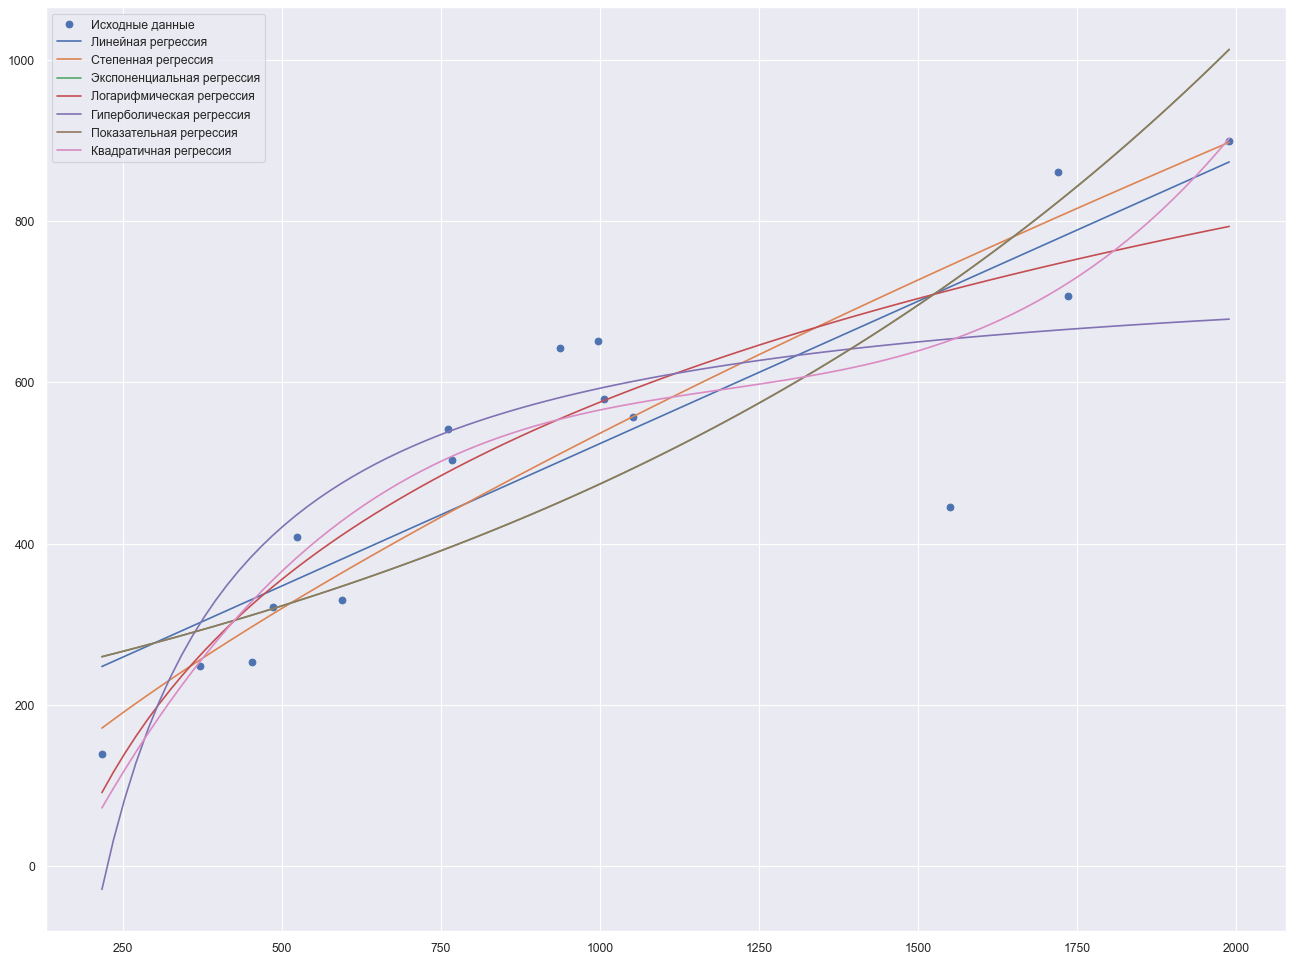

In [91]:
plt.figure(figsize = (20,15), dpi = 80)
polyline = np.linspace(min(x), max(x), 100)

plt.scatter(x, y, label='Исходные данные')
plt.plot(polyline, data['Y_line'], label='Линейная регрессия')
plt.plot(polyline, data['Y_step'], label='Степенная регрессия')
plt.plot(polyline, data['Y_exp'], label='Экспоненциальная регрессия')
plt.plot(polyline, data['Y_ln'], label='Логарифмическая регрессия')
plt.plot(polyline, data['Y_gip'], label='Гиперболическая регрессия')
plt.plot(polyline, data['Y_ind'], label='Показательная регрессия')
plt.plot(polyline, data['Y_sqr'], label='Квадратичная регрессия')

plt.legend()
plt.show()

### Линейная регрессия

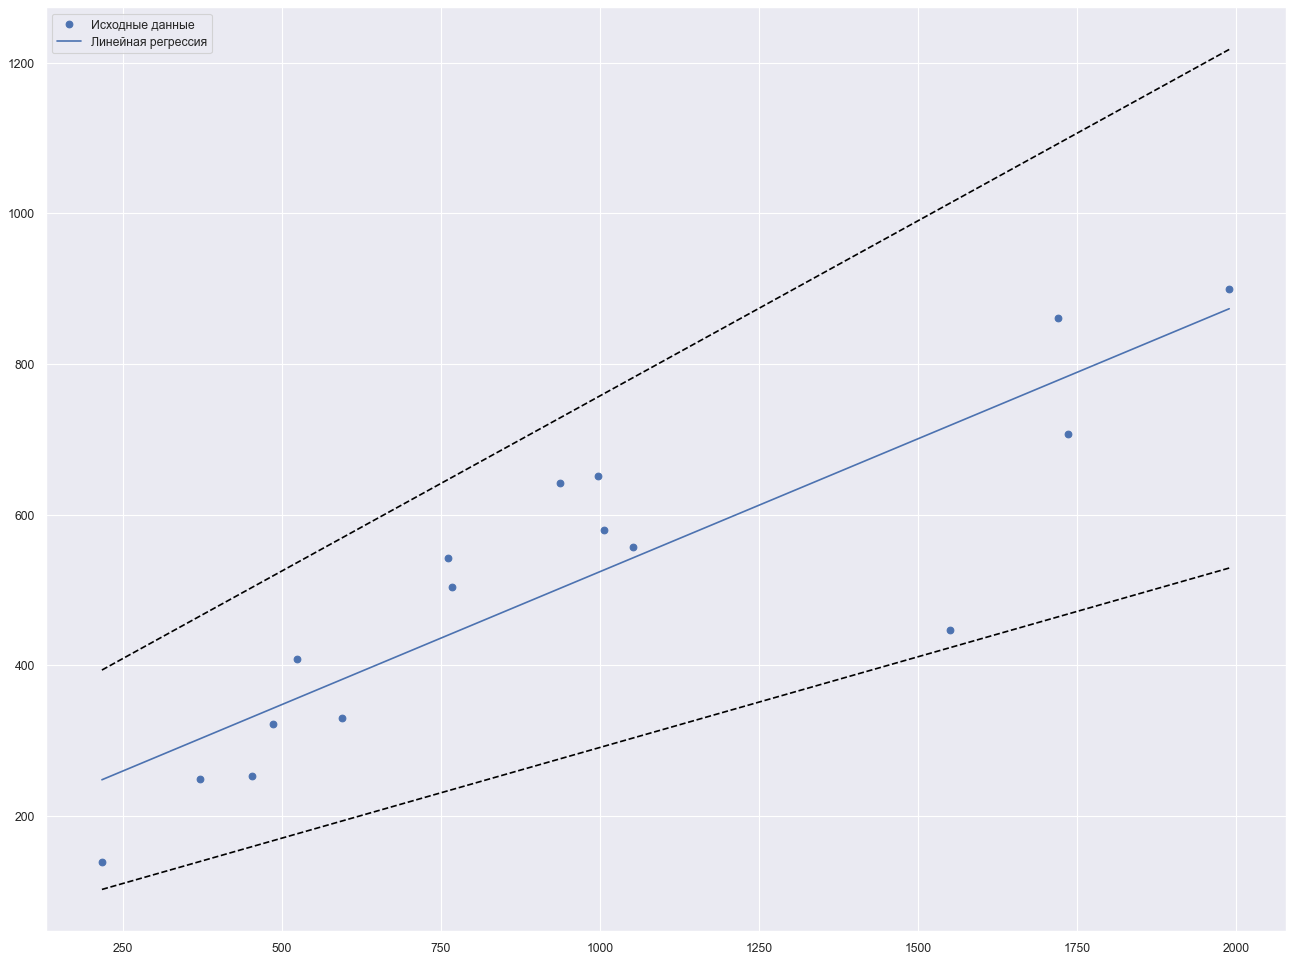

In [92]:
plt.figure(figsize = (20,15), dpi = 80)
polyline = np.linspace(min(x), max(x), 100)

plt.scatter(x, y, label='Исходные данные')
plt.plot(polyline, data['Y_line'], label='Линейная регрессия')
plt.plot(polyline, f_line(a_line - delta_a_line, b_line - delta_b_line, polyline), color='black', linestyle='dashed')
plt.plot(polyline, f_line(a_line + delta_a_line, b_line + delta_b_line, polyline), color='black', linestyle='dashed')

plt.legend()
plt.show()